In [1]:
import models
import model_setup
import numpy as np
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import random_split, DataLoader
from tqdm import tqdm
from itertools import product
from datetime import datetime
from torchvision import transforms

# Setup data

In [2]:
# Load new dataset
dataset = model_setup.load_data(max_files=30_000)

# torch.save(dataset, "preprocessed_data_30_000.pt")

# # Load from preprocessed dataset
# preprocessed_data_path = "preprocessed_data_30_000.pt"

# # Load the data
# loaded_data = torch.load(preprocessed_data_path)

Processing Data: 100%|██████████| 30000/30000 [02:37<00:00, 190.05image/s]


Split the data into training, testing, and validation sets

In [3]:
loader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
train_subset, test_subset, val_subset = random_split(loader.dataset,[0.7,0.2,0.1])
val_size = len(val_subset.indices)
del loader

In [4]:
train_transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
            transforms.GaussianBlur(kernel_size=3),
            transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=15),
            transforms.ToTensor()
            # Add any additional preprocessing steps here
        ])

for idx in tqdm(train_subset.indices, total=len(train_subset.indices)):
    input, label = train_subset.dataset.data[idx]
    new_input = train_transform(input*255) /255
    train_subset.dataset.data[idx] = (new_input, label)



100%|██████████| 21000/21000 [05:51<00:00, 59.72it/s]


In [5]:
train = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test = DataLoader(test_subset,batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val = DataLoader(val_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)

# Training

Make a parameter grid

In [6]:
param_grid = {
    'filters': [64, 128],
    'num_conv_layers': [4, 8]
}

# Get all combinations of parameters
combinations = list(product(*param_grid.values()))
combinations

[(64, 4), (64, 8), (128, 4), (128, 8)]

Train all combinations

In [7]:
saved_models = []

# for filters, num_layers in combinations:
#     print("--------------------------------------------------------")
#     print(f"Testing with \"{filters} filters\" and \"{num_layers} layers\"")
#     model = models.HandDetectionModel(filters, num_layers)
#     model.train_model(train, test, epochs=100, early_stopping_patience=10)
#     torch.save(model.state_dict(), f"models/model_{filters}_{num_layers}_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt")
#     saved_models.append(model)

model = models.HandDetectionModel()
training_info = model.train_model(train, test, epochs=50 , early_stopping_patience=10)
torch.save(model.state_dict(), "models/model_resnet50.pt")
saved_models.append(model)

Epoch 1/50 (Training): 100%|██████████| 329/329 [02:30<00:00,  2.18it/s]


Loss: 0.5332, Validation Accuracy: 0.7993, Full Accuracy: [0.9979736575481256, 0.6571287617168229, 0.7473736868434218], Time remaining: 2:15:51.745399


Epoch 2/50 (Training): 100%|██████████| 329/329 [03:18<00:00,  1.66it/s]


Loss: 0.2961, Validation Accuracy: 0.8528, Full Accuracy: [0.997467071935157, 0.8598914652195363, 0.7028514257128564], Time remaining: 2:31:36.131808


Epoch 3/50 (Training): 100%|██████████| 329/329 [03:13<00:00,  1.70it/s]


Loss: 0.1603, Validation Accuracy: 0.8802, Full Accuracy: [0.9994934143870314, 0.7276763690182536, 0.9169584792396198], Time remaining: 2:33:15.353070


Epoch 4/50 (Training): 100%|██████████| 329/329 [03:09<00:00,  1.74it/s]


Loss: 0.0883, Validation Accuracy: 0.8778, Full Accuracy: [0.9984802431610942, 0.734583127775037, 0.903951975987994], Time remaining: 2:31:37.442126


Epoch 5/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0646, Validation Accuracy: 0.8938, Full Accuracy: [0.9989868287740629, 0.8519980266403552, 0.832416208104052], Time remaining: 2:31:07.434705


Epoch 6/50 (Training): 100%|██████████| 329/329 [03:24<00:00,  1.61it/s]


Loss: 0.0608, Validation Accuracy: 0.8987, Full Accuracy: [0.9994934143870314, 0.8791317217562901, 0.8189094547273637], Time remaining: 2:29:53.362048


Epoch 7/50 (Training): 100%|██████████| 329/329 [03:26<00:00,  1.60it/s]


Loss: 0.0311, Validation Accuracy: 0.9008, Full Accuracy: [0.9989868287740629, 0.8544647261963493, 0.8509254627313657], Time remaining: 2:28:09.181536


Epoch 8/50 (Training): 100%|██████████| 329/329 [03:25<00:00,  1.60it/s]


Loss: 0.0219, Validation Accuracy: 0.8963, Full Accuracy: [0.9979736575481256, 0.8268376911692156, 0.8664332166083042], Time remaining: 2:25:52.071258


Epoch 9/50 (Training): 100%|██████████| 329/329 [03:25<00:00,  1.60it/s]


Loss: 0.0302, Validation Accuracy: 0.8937, Full Accuracy: [0.9979736575481256, 0.7765170202269364, 0.9094547273636818], Time remaining: 2:23:14.923972


Epoch 10/50 (Training): 100%|██████████| 329/329 [03:24<00:00,  1.61it/s]


Loss: 0.0204, Validation Accuracy: 0.8985, Full Accuracy: [0.9994934143870314, 0.8288110508140109, 0.8694347173586794], Time remaining: 2:20:23.579280


Epoch 11/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0233, Validation Accuracy: 0.9108, Full Accuracy: [0.9979736575481256, 0.8968919585594475, 0.8389194597298649], Time remaining: 2:17:11.871180


Epoch 12/50 (Training): 100%|██████████| 329/329 [03:20<00:00,  1.64it/s]


Loss: 0.0233, Validation Accuracy: 0.9028, Full Accuracy: [0.997467071935157, 0.857918105574741, 0.8549274637318659], Time remaining: 2:13:54.377430


Epoch 13/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0185, Validation Accuracy: 0.9090, Full Accuracy: [0.9984802431610942, 0.8638381845091267, 0.8664332166083042], Time remaining: 2:10:37.049661


Epoch 14/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.64it/s]


Loss: 0.0188, Validation Accuracy: 0.8960, Full Accuracy: [0.9984802431610942, 0.7794770596941293, 0.9129564782391195], Time remaining: 2:07:14.880612


Epoch 15/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0340, Validation Accuracy: 0.9047, Full Accuracy: [0.9979736575481256, 0.889985199802664, 0.8274137068534267], Time remaining: 2:03:51.798885


Epoch 16/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0178, Validation Accuracy: 0.8973, Full Accuracy: [0.9994934143870314, 0.8421312284163789, 0.8524262131065533], Time remaining: 2:00:27.742270


Epoch 17/50 (Training): 100%|██████████| 329/329 [03:22<00:00,  1.63it/s]


Loss: 0.0199, Validation Accuracy: 0.9147, Full Accuracy: [0.997467071935157, 0.8751850024666995, 0.8729364682341171], Time remaining: 1:57:03.024558


Epoch 18/50 (Training): 100%|██████████| 329/329 [03:20<00:00,  1.64it/s]


Loss: 0.0160, Validation Accuracy: 0.9063, Full Accuracy: [0.9984802431610942, 0.9042920572274297, 0.817408704352176], Time remaining: 1:53:34.339968


Epoch 19/50 (Training): 100%|██████████| 329/329 [03:19<00:00,  1.65it/s]


Loss: 0.0149, Validation Accuracy: 0.9078, Full Accuracy: [0.9979736575481256, 0.8840651208682783, 0.8429214607303652], Time remaining: 1:50:03.351571


Epoch 20/50 (Training): 100%|██████████| 329/329 [03:21<00:00,  1.63it/s]


Loss: 0.0180, Validation Accuracy: 0.9070, Full Accuracy: [0.9979736575481256, 0.88751850024667, 0.8369184592296148], Time remaining: 1:46:34.507440


Epoch 21/50 (Training): 100%|██████████| 329/329 [03:20<00:00,  1.64it/s]


Loss: 0.0141, Validation Accuracy: 0.9157, Full Accuracy: [0.997467071935157, 0.8914652195362605, 0.8594297148574287], Time remaining: 1:43:03.408362


Epoch 22/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.0175, Validation Accuracy: 0.9132, Full Accuracy: [0.9989868287740629, 0.8376911692155895, 0.904952476238119], Time remaining: 1:39:27.332476


Epoch 23/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.68it/s]


Loss: 0.0114, Validation Accuracy: 0.9125, Full Accuracy: [0.9989868287740629, 0.8806117414898865, 0.8594297148574287], Time remaining: 1:35:51.512190


Epoch 24/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.67it/s]


Loss: 0.0182, Validation Accuracy: 0.9132, Full Accuracy: [0.9994934143870314, 0.8623581647755303, 0.87943971985993], Time remaining: 1:32:17.039872


Epoch 25/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.66it/s]


Loss: 0.0166, Validation Accuracy: 0.9158, Full Accuracy: [0.9994934143870314, 0.8850518006906759, 0.864432216108054], Time remaining: 1:28:43.377100


Epoch 26/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.66it/s]


Loss: 0.0136, Validation Accuracy: 0.9157, Full Accuracy: [0.9964539007092199, 0.900838677849038, 0.8509254627313657], Time remaining: 1:25:09.842760


Epoch 27/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.66it/s]


Loss: 0.0083, Validation Accuracy: 0.9192, Full Accuracy: [0.9984802431610942, 0.8722249629995067, 0.8884442221110556], Time remaining: 1:21:36.358197


Epoch 28/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.67it/s]


Loss: 0.0020, Validation Accuracy: 0.9217, Full Accuracy: [0.9984802431610942, 0.9077454366058214, 0.8599299649824912], Time remaining: 1:18:03.091930


Epoch 29/50 (Training): 100%|██████████| 329/329 [03:18<00:00,  1.66it/s]


Loss: 0.0052, Validation Accuracy: 0.9213, Full Accuracy: [0.997467071935157, 0.8815984213122842, 0.8864432216108054], Time remaining: 1:14:29.900043


Epoch 30/50 (Training): 100%|██████████| 329/329 [03:18<00:00,  1.66it/s]


Loss: 0.0013, Validation Accuracy: 0.9215, Full Accuracy: [0.9989868287740629, 0.868771583621115, 0.8984492246123061], Time remaining: 1:10:57.321520


Epoch 31/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.67it/s]


Loss: 0.0019, Validation Accuracy: 0.9142, Full Accuracy: [0.9994934143870314, 0.8500246669955599, 0.8949474737368684], Time remaining: 1:07:23.611046


Epoch 32/50 (Training): 100%|██████████| 329/329 [03:18<00:00,  1.66it/s]


Loss: 0.0022, Validation Accuracy: 0.9170, Full Accuracy: [0.9994934143870314, 0.8811050814010853, 0.871935967983992], Time remaining: 1:03:50.683302


Epoch 33/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.66it/s]


Loss: 0.0018, Validation Accuracy: 0.9188, Full Accuracy: [0.9989868287740629, 0.8544647261963493, 0.904952476238119], Time remaining: 1:00:17.478195


Epoch 34/50 (Training): 100%|██████████| 329/329 [03:16<00:00,  1.68it/s]


Loss: 0.0008, Validation Accuracy: 0.9218, Full Accuracy: [0.9989868287740629, 0.8860384805130735, 0.8819409704852427], Time remaining: 0:56:43.722864


Epoch 35/50 (Training): 100%|██████████| 329/329 [03:15<00:00,  1.68it/s]


Loss: 0.0003, Validation Accuracy: 0.9230, Full Accuracy: [0.9989868287740629, 0.8850518006906759, 0.8864432216108054], Time remaining: 0:53:09.770460


Epoch 36/50 (Training): 100%|██████████| 329/329 [03:18<00:00,  1.66it/s]


Loss: 0.0001, Validation Accuracy: 0.9218, Full Accuracy: [0.9989868287740629, 0.865811544153922, 0.9024512256128064], Time remaining: 0:49:37.282490


Epoch 37/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.66it/s]


Loss: 0.0002, Validation Accuracy: 0.9247, Full Accuracy: [0.9989868287740629, 0.8894918598914652, 0.886943471735868], Time remaining: 0:46:04.480121


Epoch 38/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.67it/s]


Loss: 0.0000, Validation Accuracy: 0.9252, Full Accuracy: [0.9989868287740629, 0.8815984213122842, 0.896448224112056], Time remaining: 0:42:31.610904


Epoch 39/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.67it/s]


Loss: 0.0001, Validation Accuracy: 0.9217, Full Accuracy: [0.9989868287740629, 0.8934385791810557, 0.8739369684842421], Time remaining: 0:38:58.730152


Epoch 40/50 (Training): 100%|██████████| 329/329 [03:18<00:00,  1.66it/s]


Loss: 0.0012, Validation Accuracy: 0.9212, Full Accuracy: [0.9994934143870314, 0.889985199802664, 0.8754377188594297], Time remaining: 0:35:26.085220


Epoch 41/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.67it/s]


Loss: 0.0028, Validation Accuracy: 0.9233, Full Accuracy: [0.9989868287740629, 0.8929452392698569, 0.87943971985993], Time remaining: 0:31:53.277969


Epoch 42/50 (Training): 100%|██████████| 329/329 [03:18<00:00,  1.66it/s]


Loss: 0.0009, Validation Accuracy: 0.9225, Full Accuracy: [0.9984802431610942, 0.8717316230883079, 0.8989494747373686], Time remaining: 0:28:20.652536


Epoch 43/50 (Training): 100%|██████████| 329/329 [03:18<00:00,  1.66it/s]


Loss: 0.0002, Validation Accuracy: 0.9253, Full Accuracy: [0.9984802431610942, 0.9047853971386285, 0.8739369684842421], Time remaining: 0:24:48.146499


Epoch 44/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.67it/s]


Loss: 0.0001, Validation Accuracy: 0.9243, Full Accuracy: [0.9984802431610942, 0.8924518993586581, 0.8834417208604303], Time remaining: 0:21:15.406932


Epoch 45/50 (Training): 100%|██████████| 329/329 [03:18<00:00,  1.66it/s]


Loss: 0.0001, Validation Accuracy: 0.9242, Full Accuracy: [0.9979736575481256, 0.8889985199802664, 0.886943471735868], Time remaining: 0:17:42.893825


Epoch 46/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.67it/s]


Loss: 0.0000, Validation Accuracy: 0.9235, Full Accuracy: [0.9984802431610942, 0.9107054760730143, 0.8624312156078039], Time remaining: 0:14:10.249444


Epoch 47/50 (Training): 100%|██████████| 329/329 [03:18<00:00,  1.66it/s]


Loss: 0.0000, Validation Accuracy: 0.9247, Full Accuracy: [0.9979736575481256, 0.9057720769610261, 0.8714357178589295], Time remaining: 0:10:37.682124


Epoch 48/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.67it/s]


Loss: 0.0000, Validation Accuracy: 0.9242, Full Accuracy: [0.9989868287740629, 0.9111988159842132, 0.863431715857929], Time remaining: 0:07:05.084866


Epoch 49/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.66it/s]


Loss: 0.0000, Validation Accuracy: 0.9245, Full Accuracy: [0.9989868287740629, 0.8830784410458806, 0.8929464732366184], Time remaining: 0:03:32.531976


Epoch 50/50 (Training): 100%|██████████| 329/329 [03:17<00:00,  1.66it/s]


Loss: 0.0001, Validation Accuracy: 0.9238, Full Accuracy: [0.9989868287740629, 0.8796250616674889, 0.894447223611806], Time remaining: 0:00:00


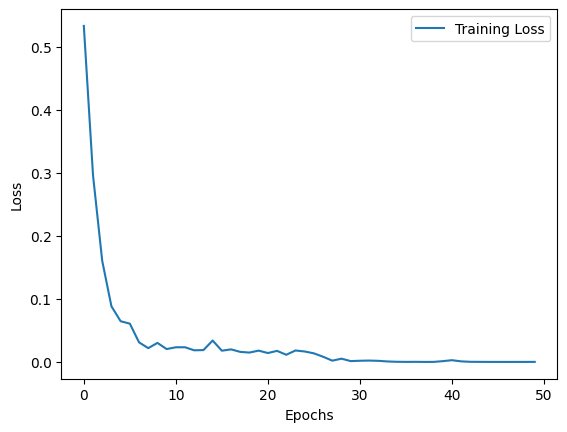

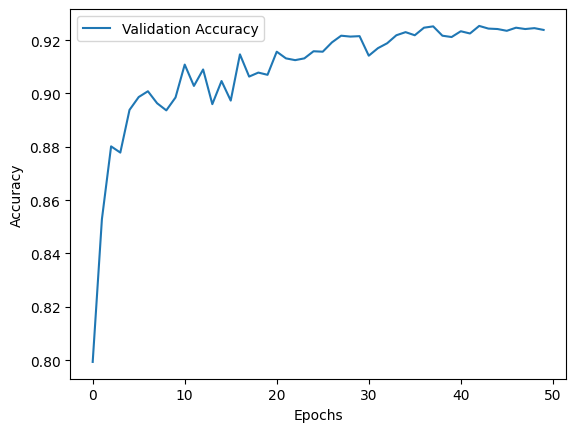

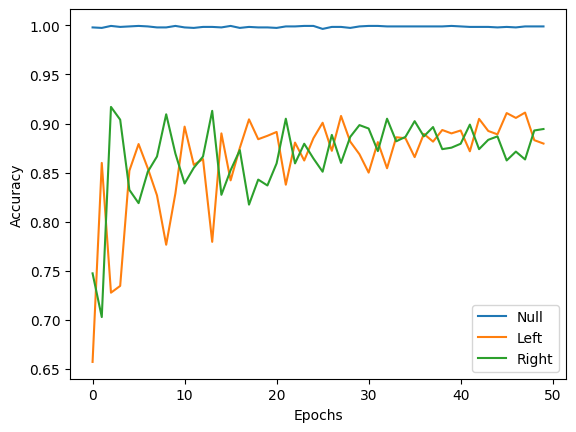

In [8]:
# Plot loss and accuracy
# Plot training loss
plt.plot(training_info['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot validation accuracy
plt.plot(training_info['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot full accuracy
full_acc_array = np.array(training_info['full_acc']).T  # Transpose for easy plotting
labels = ['Null', 'Left', 'Right']
for i in range(3):
    plt.plot(full_acc_array[i], label=labels[i])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Validation

--------------------------------------------------------
Validating with "4 filters" and "64 layers"


Evaluating: 100%|██████████| 94/94 [00:09<00:00, 10.03it/s]


Accuracy: 92.57%


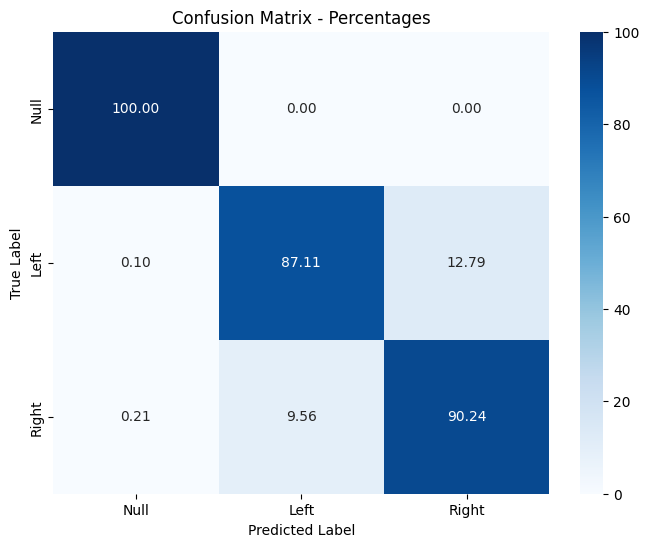

In [9]:
class_labels = [0, 1, 2]
for idx, model in enumerate(saved_models):
    num_layers, filters = combinations[idx]
    print("--------------------------------------------------------")
    print(f"Validating with \"{filters} filters\" and \"{num_layers} layers\"")
    with torch.no_grad():
        correct_predictions = 0
        true_labels = []
        predicted_labels = []
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Wrap the loop with tqdm to add a progress bar
        for inputs, labels in tqdm(val, total=len(val), desc="Evaluating"):
            outputs = model(inputs.to(device))
            true_labels.extend(labels.tolist())

            for idx, output in enumerate(outputs):
                predicted_label = torch.argmax(output)
                predicted_labels.append(predicted_label.item())

                # print(f"True Label: {labels[idx]}, Predicted Label: {predicted_label.item()}")

                if predicted_label.item() == labels[idx]:
                    correct_predictions += 1

        accuracy = correct_predictions / val_size
        print(f"Accuracy: {accuracy * 100:.2f}%")

    # Convert true and predicted labels to numpy arrays
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)


    # Create confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

    # Normalize the confusion matrix to get percentages
    conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Null", "Left", "Right"], yticklabels=["Null", "Left", "Right"])
    plt.title('Confusion Matrix - Percentages')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [10]:
from PIL import Image
from os import listdir
import torch.nn.functional as F

image_head = "../images/"
paths = listdir(image_head)

transform = transforms.Compose({
    transforms.Resize((224, 224)),
    transforms.ToTensor()
})

for path in paths:
    image = Image.open(image_head+path)
    image = transform(image) / 255
    output = model(torch.stack([image]).to(device))
    print(torch.argmax(output),F.softmax(output, dim=1).tolist())

tensor(0, device='cuda:0') [[0.9999874830245972, 6.461340035457397e-06, 6.103819941927213e-06]]
tensor(2, device='cuda:0') [[6.373798555614485e-07, 1.3113712157064583e-05, 0.9999862909317017]]
tensor(1, device='cuda:0') [[0.014194878749549389, 0.9849228858947754, 0.0008822306408546865]]
tensor(2, device='cuda:0') [[0.22997726500034332, 0.15413124859333038, 0.6158915162086487]]
tensor(2, device='cuda:0') [[0.07586029171943665, 0.01545459870249033, 0.9086850881576538]]
tensor(0, device='cuda:0') [[0.9986224174499512, 0.0009911770466715097, 0.00038639100966975093]]
tensor(1, device='cuda:0') [[0.010129508562386036, 0.7974153161048889, 0.1924552172422409]]
tensor(1, device='cuda:0') [[0.3464548587799072, 0.38898125290870667, 0.2645639181137085]]
tensor(1, device='cuda:0') [[0.34030815958976746, 0.6548081040382385, 0.004883777815848589]]
tensor(1, device='cuda:0') [[0.25160160660743713, 0.7469584941864014, 0.0014399022329598665]]
tensor(0, device='cuda:0') [[0.7428896427154541, 0.0004981299

In [ ]:
from PIL import Image
from os import listdir
import torch.nn.functional as F

image_head = "../images/"
paths = listdir(image_head)

transform = transforms.Compose({
    transforms.Resize((224, 224)),
    transforms.ToTensor()
})

for path in paths:
    image = Image.open(image_head+path)
    image = transform(image) / 255
    output = model(torch.stack([image]).to(device))
    print(torch.argmax(output),F.softmax(output, dim=1).tolist())

tensor(0, device='cuda:0') [[0.9999874830245972, 6.461340035457397e-06, 6.103819941927213e-06]]
tensor(2, device='cuda:0') [[6.373798555614485e-07, 1.3113712157064583e-05, 0.9999862909317017]]
tensor(1, device='cuda:0') [[0.014194878749549389, 0.9849228858947754, 0.0008822306408546865]]
tensor(2, device='cuda:0') [[0.22997726500034332, 0.15413124859333038, 0.6158915162086487]]
tensor(2, device='cuda:0') [[0.07586029171943665, 0.01545459870249033, 0.9086850881576538]]
tensor(0, device='cuda:0') [[0.9986224174499512, 0.0009911770466715097, 0.00038639100966975093]]
tensor(1, device='cuda:0') [[0.010129508562386036, 0.7974153161048889, 0.1924552172422409]]
tensor(1, device='cuda:0') [[0.3464548587799072, 0.38898125290870667, 0.2645639181137085]]
tensor(1, device='cuda:0') [[0.34030815958976746, 0.6548081040382385, 0.004883777815848589]]
tensor(1, device='cuda:0') [[0.25160160660743713, 0.7469584941864014, 0.0014399022329598665]]
tensor(0, device='cuda:0') [[0.7428896427154541, 0.0004981299